In [1]:
import os 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns

from src.data_exploration import *
from src.visualization import *

PATH_TO_GOLDMAN_DATA = "data/LemmaSplitting/LemmaSplitData"
PATH_TO_SIGMORPHON20 = "data/SIGMORPHON2020/train"
PATH_TO_SIGMORPHON22 = "data/2022InflectionST/part1/development_languages"

lud -47.27891156462585
Mean percent increase in training size: -3.499
Standard deviation in training size increase: 6.341


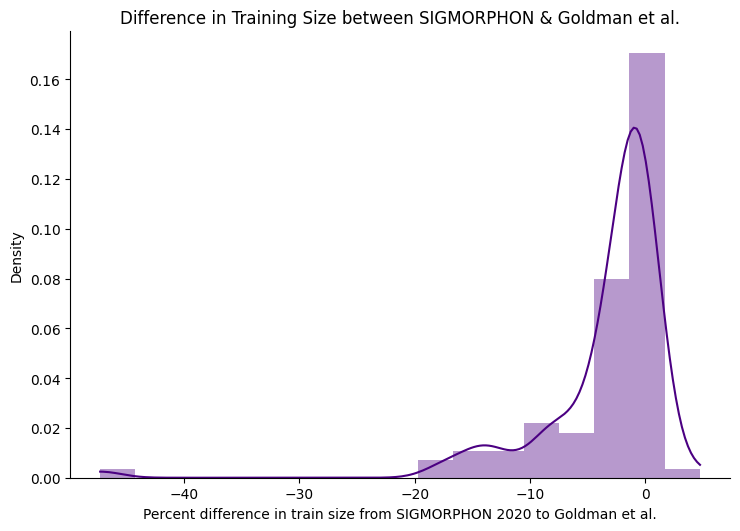

In [12]:
# Get all the training sizes for Goldman
goldman_dict = {}
for f in [f for f in os.listdir(PATH_TO_GOLDMAN_DATA) if "." not in f]:
    for lang in set([l.strip().split(".")[0] for l in os.listdir(f"{PATH_TO_GOLDMAN_DATA}/{f}")]):
        train, dev, _ = parse_files(f"{PATH_TO_GOLDMAN_DATA}/{f}/{lang}")
        goldman_dict[lang] = len(train)

# Get all the training sizes for SIGMORPHON
sigmorphon_dict = {}
for f in [f for f in os.listdir(PATH_TO_SIGMORPHON20) if "." not in f]:
     for lang in set([l.strip().split(".")[0] for l in os.listdir(f"{PATH_TO_SIGMORPHON20}/{f}")]):
        train, dev, _ = parse_files(f"{PATH_TO_SIGMORPHON20}/{f}/{lang}")
        sigmorphon_dict[lang] = len(train) 
        
# Calculate the differences for each language
differences = [100 * (goldman_dict[lang] - sigmorphon_dict[lang]) / sigmorphon_dict[lang] for lang in sorted(goldman_dict)]
for lang, diff in zip(sorted(goldman_dict), differences):
    if diff < -20:
        print(lang, diff)
differences = np.asarray(differences)

# Calculate the mean and standard deviation in the percent difference
print(f"Mean percent increase in training size: {np.mean(differences) :.3f}")
print(f"Standard deviation in training size increase: {np.std(differences) :.3f}")

# Plot the results 
sns.displot(differences,
            color="indigo",
            linewidth=0,
            alpha=0.4,
            kde=True,
            binwidth = 3,
            kde_kws = {"bw_adjust": 0.7},
            stat="density",
            aspect=1.5,
           )
plt.xlabel("Percent difference in train size from SIGMORPHON 2020 to Goldman et al.")
plt.title("Difference in Training Size between SIGMORPHON & Goldman et al.")
plt.savefig("../writeup/figs/training_difference.png", dpi=500, bbox_inches='tight')

evn -9.39123979213066
kpv -19.981849682369443
lud -6.185567010309279
tgk 1.9607843137254901
xno -40.0
Mean percent increase in training size: -28.846
Standard deviation in training size increase: 5.221


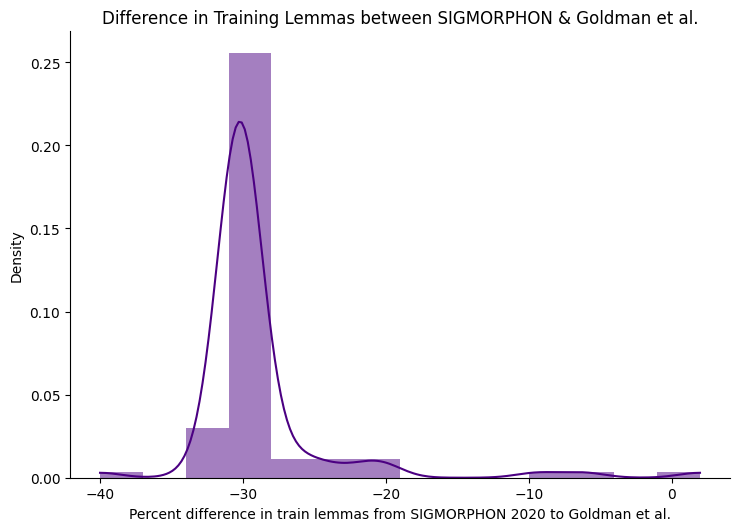

In [14]:
# Get all the training lemmas for Goldman
goldman_dict = {}
for f in [f for f in os.listdir(PATH_TO_GOLDMAN_DATA) if "." not in f]:
    for lang in set([l.strip().split(".")[0] for l in os.listdir(f"{PATH_TO_GOLDMAN_DATA}/{f}")]):
        train, dev, _ = parse_files(f"{PATH_TO_GOLDMAN_DATA}/{f}/{lang}", 0)
        goldman_dict[lang] = len(set(train))

# Get all the training lemmas for SIGMORPHON
sigmorphon_dict = {}
for f in [f for f in os.listdir(PATH_TO_SIGMORPHON20) if "." not in f]:
     for lang in set([l.strip().split(".")[0] for l in os.listdir(f"{PATH_TO_SIGMORPHON20}/{f}")]):
        train, dev, _ = parse_files(f"{PATH_TO_SIGMORPHON20}/{f}/{lang}", 0)
        sigmorphon_dict[lang] = len(set(train)) 
        
# Calculate the differences for each language
differences = [100 * (goldman_dict[lang] - sigmorphon_dict[lang]) / sigmorphon_dict[lang] for lang in sorted(goldman_dict)]
for lang, diff in zip(sorted(goldman_dict), differences):
    if diff > -20 or diff < -35:
        print(lang, diff)

differences = np.asarray(differences)

# Calculate the mean and standard deviation in the percent difference
print(f"Mean percent increase in training size: {np.mean(differences) :.3f}")
print(f"Standard deviation in training size increase: {np.std(differences) :.3f}")

# Plot the results 
sns.displot(differences,
            color="indigo",
            linewidth=0,
            alpha=0.5,
            kde=True,
            binwidth = 3,
            kde_kws = {"bw_adjust": 0.7},
            stat="density",
            aspect=1.5,
           )
plt.xlabel("Percent difference in train lemmas from SIGMORPHON 2020 to Goldman et al.")
plt.title("Difference in Training Lemmas between SIGMORPHON & Goldman et al.")
plt.savefig("../writeup/figs/lemmas_difference.png", dpi=500, bbox_inches='tight')

In [16]:
sizes = []
for f in [f for f in os.listdir(PATH_TO_SIGMORPHON20) if "." not in f]:
     for lang in set([l.strip().split(".")[0] for l in os.listdir(f"{PATH_TO_SIGMORPHON20}/{f}")]):
        train, dev, _ = parse_files(f"{PATH_TO_SIGMORPHON20}/{f}/{lang}", 0)
        sizes.append(len(train))
np.std(np.asarray(sizes))

26035.04482628495